In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

In [2]:
from statsmodels.datasets.longley import load_pandas

# gnp deflator(실질 GNP), GNP, 실업자수, 군대, 인구
dfX = load_pandas().exog
# 고용자 수
dfy = load_pandas().endog
# 데이터프레임 생성
df = pd.concat([dfX, dfy], axis = 1)

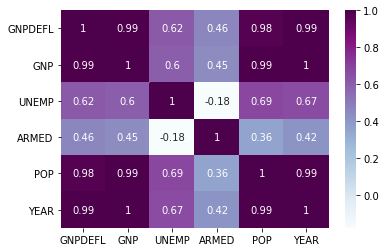

In [3]:
# 관계를 그림으로 그림
# annot = True: 관계지수 숫자 출력
# cmap = 색깔 / "BuPu" : 파랑 ~ 보라 / "BuPu_r" : _r = reverse 색깔이 반대로
# annot = 칸 이름 / corr = 상관계수
sns.heatmap(dfX.corr(), annot = True, cmap = "BuPu")
plt.show()

In [4]:
df.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR,TOTEMP
0,83.0,234289.0,2356.0,1590.0,107608.0,1947.0,60323.0
1,88.5,259426.0,2325.0,1456.0,108632.0,1948.0,61122.0
2,88.2,258054.0,3682.0,1616.0,109773.0,1949.0,60171.0
3,89.5,284599.0,3351.0,1650.0,110929.0,1950.0,61187.0
4,96.2,328975.0,2099.0,3099.0,112075.0,1951.0,63221.0


In [5]:
# TOTEMP 컬럼을 Y에 대입
y = df['TOTEMP'] # TOTEMP 고용자 수
# TOTEMP, YEAR 컬러을 제외하고 X에 대입
X = df.drop(['TOTEMP', 'YEAR'], axis = 1)
X.head()

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,83.0,234289.0,2356.0,1590.0,107608.0
1,88.5,259426.0,2325.0,1456.0,108632.0
2,88.2,258054.0,3682.0,1616.0,109773.0
3,89.5,284599.0,3351.0,1650.0,110929.0
4,96.2,328975.0,2099.0,3099.0,112075.0


In [6]:
# 범위조절 MinMaxScaler
GNPDEFL = df["GNPDEFL"]
GNPDEFL.min()

83.0

In [7]:
GNPDEFL.max()

116.9

In [8]:
# 0 ~ 1 사이의 범위 만들기 / min은 0, max는 1로 만들어준다
GNPDEFL - GNPDEFL.min()

0      0.0
1      5.5
2      5.2
3      6.5
4     13.2
5     15.1
6     16.0
7     17.0
8     18.2
9     21.6
10    25.4
11    27.8
12    29.6
13    31.2
14    32.7
15    33.9
Name: GNPDEFL, dtype: float64

In [9]:
# 데이터 - 최소값 / (최대값 - 최소값)
(GNPDEFL - GNPDEFL.min()) / (GNPDEFL.max() - GNPDEFL.min())

0     0.000000
1     0.162242
2     0.153392
3     0.191740
4     0.389381
5     0.445428
6     0.471976
7     0.501475
8     0.536873
9     0.637168
10    0.749263
11    0.820059
12    0.873156
13    0.920354
14    0.964602
15    1.000000
Name: GNPDEFL, dtype: float64

In [10]:
from sklearn.preprocessing import MinMaxScaler
# 데이터의 범위를 일정하게 만들어주는 객체 생성
scaler = MinMaxScaler()
# 각 컬럼의 최소값, 최대값 계산
scaler.fit(X)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
# 데이터 - 최소값 / (최대값 - 최소값)를 계산해서 각 컬럼의 데이터 범위를 0~1 사이로 일정하게 맞춘 후 변수 X_scaled에 대입
X_scaled = scaler.transform(X)
X_scaled

array([[0.        , 0.        , 0.16553134, 0.0626754 , 0.        ],
       [0.16224189, 0.07840489, 0.15497275, 0.        , 0.04556579],
       [0.15339233, 0.07412548, 0.61716621, 0.0748363 , 0.09633783],
       [0.19174041, 0.15692207, 0.50442779, 0.09073901, 0.14777733],
       [0.38938053, 0.29533538, 0.07799728, 0.76847521, 0.19877186],
       [0.44542773, 0.35155409, 0.02111717, 1.        , 0.25194678],
       [0.4719764 , 0.40890192, 0.        , 0.97801684, 0.33311084],
       [0.50147493, 0.4018122 , 0.58174387, 0.88587465, 0.38317092],
       [0.53687316, 0.50897522, 0.35217984, 0.74462114, 0.43518889],
       [0.63716814, 0.57669406, 0.32425068, 0.65528531, 0.49508299],
       [0.74926254, 0.65027058, 0.36307902, 0.62768943, 0.5712188 ],
       [0.820059  , 0.65581323, 0.95742507, 0.55238541, 0.63818805],
       [0.87315634, 0.77483196, 0.66178474, 0.51262862, 0.70119699],
       [0.92035398, 0.83689275, 0.70197548, 0.494855  , 0.79028167],
       [0.96460177, 0.88546342, 1.

In [12]:
# X_scaled를 DataFrame으로 생성
# columns의 이름은 X, columns(X의 컬럼)으로 설정
X = pd.DataFrame(X_scaled, columns = X.columns)
X

,GNPDEFL,GNP,UNEMP,ARMED,POP
0,0.000000,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.078405,0.154973,0.000000,0.045566
2,0.153392,0.074125,0.617166,0.074836,0.096338
3,0.191740,0.156922,0.504428,0.090739,0.147777
4,0.389381,0.295335,0.077997,0.768475,0.198772
5,0.445428,0.351554,0.021117,1.000000,0.251947
6,0.471976,0.408902,0.000000,0.978017,0.333111
7,0.501475,0.401812,0.581744,0.885875,0.383171
8,0.536873,0.508975,0.352180,0.744621,0.435189
9,0.637168,0.576694,0.324251,0.655285,0.495083


In [13]:
# 선형회귀 객체 생성
reg = LinearRegression()
# 선형회귀 실행
reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
# Weight 출력
print(reg.coef_)
# Bias 출력
print(reg.intercept_)

[-1642.88987543 23084.79411175 -1185.7654284  -1198.33955478
 -9068.05060078]
60316.520285629886


In [15]:
print("The linear model is: Y = {} + {}*GNPDEFL + {}*GNP + {}*UNEMP + {}*ARMED + {}*POP".format(
    reg.intercept_, reg.coef_[0], reg.coef_[1], reg.coef_[2], reg.coef_[3], reg.coef_[4]))

The linear model is: Y = 60316.520285629886 + -1642.889875430809*GNPDEFL + 23084.794111748724*GNP + -1185.7654284028133*UNEMP + -1198.3395547765765*ARMED + -9068.050600778124*POP


In [16]:
# X의 예측치를 prediction에 대입
predictions = reg.predict(X)
predictions

array([60045.13254307, 61262.98126938, 60080.59511106, 61577.10404942,
       63678.7134359 , 64192.23972166, 64787.86941276, 63542.40042971,
       65927.85839769, 66923.40975212, 67734.37439117, 66524.21866929,
       69011.34237133, 69532.28010289, 69192.6183171 , 71058.86202547])

In [17]:
# 실제 데이터 y에서 예측값 predictions를 빼서 잔차를 계산
residuals = y - predictions
residuals.describe()

count    1.600000e+01
mean     3.637979e-12
std      3.945662e+02
min     -5.532397e+02
25%     -3.647828e+02
50%      6.106239e+01
75%      2.054978e+02
max      9.335902e+02
Name: TOTEMP, dtype: float64

In [18]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_square = 1 - (SSE/SST)
R_square

0.9873776967532714

In [19]:
exog = X
exog_idx = 1

In [20]:
# 전체 칸의 수
exog.values.shape[1]

5

In [21]:
# 칸 = k / 줄 = n
k_vars = exog.values.shape[1]
k_vars

5

In [22]:
arr = np.arange(k_vars)
arr

array([0, 1, 2, 3, 4])

In [23]:
arr != exog_idx

array([ True, False,  True,  True,  True])

In [24]:
# 줄은 전부, 칸은 조건이 True인 칸
x_noti = exog.iloc[:,arr != exog_idx]
x_noti

,GNPDEFL,UNEMP,ARMED,POP
0,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.154973,0.000000,0.045566
2,0.153392,0.617166,0.074836,0.096338
3,0.191740,0.504428,0.090739,0.147777
4,0.389381,0.077997,0.768475,0.198772
5,0.445428,0.021117,1.000000,0.251947
6,0.471976,0.000000,0.978017,0.333111
7,0.501475,0.581744,0.885875,0.383171
8,0.536873,0.352180,0.744621,0.435189
9,0.637168,0.324251,0.655285,0.495083


In [25]:
# 칸 인덱스 // [줄은 전부, exog_idx 칸]
x_i = exog.iloc[:, exog_idx]
# series 형태임
x_i

0     0.000000
1     0.078405
2     0.074125
3     0.156922
4     0.295335
5     0.351554
6     0.408902
7     0.401812
8     0.508975
9     0.576694
10    0.650271
11    0.655813
12    0.774832
13    0.836893
14    0.885463
15    1.000000
Name: GNP, dtype: float64

In [26]:
lr = LinearRegression().fit(X = x_noti, y = x_i)

In [27]:
lr.score(X = x_noti, y = x_i)
vif = 1 / (1-R_square)
vif

79.22484355295244

In [28]:
from sklearn.linear_model import LinearRegression
# 다중공선성을  계산하는 함수 구현
# exog; 데이터프레임
# exog_idx: 다중공선성을 계산하고자 하는 컬럼의 인덱스
def variance_inflation_factor(exog, exog_idx):
    # 독립변수의 개수를 k_vars에 대입
    k_vars = exog.values.shape[1]
    # VIF를 계산하고자 하는 독립변수를 대입
    x_i = exog.iloc[:, exog_idx]
    
    # VIF를 구하고자 하는 독립변수 인덱스 exog_idx가 아니면 True, 맞으면 False 대입
    mask = np.arange(k_vars) != exog_idx
    # mask가 True인 열 대입
    x_noti = exog.iloc[:, mask]
    
    # r square 계산
    r_squared_i = LinearRegression().fit(X = pd.DataFrame(x_noti), y = pd.Series(x_i)).score(X = pd.DataFrame(x_noti), y = pd.Series(x_i))
    vif = 1. / (1. - r_squared_i)
    return vif

In [29]:
variance_inflation_factor(X, 0)

130.82920134037101

In [30]:
# 다중공선성을 계산해서 저장할 DataFrame 생성
vif = pd.DataFrame()
# 다중공선성을 계산해서 VIF Factor 컬럼에 추가
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
# X의 컬럼명을 feature 컬럼에 대입
vif["features"] = X.columns
vif

,VIF Factor,features
0,130.829201,GNPDEFL
1,639.049777,GNP
2,10.786858,UNEMP
3,2.505775,ARMED
4,339.011693,POP


#### 다중공선성 지수가 10 초과이면
#### 다중공선성 값이 가장 높은 컬럼을 삭제하고
#### 다중공선성 지수를 다시 계산
#### 다중공선성 지수가 10 초과가 없을 때까지 반복

In [31]:
# 다중공선성 지수가 가장 높은 GMP를 삭제
X = X.drop(['GNP'], axis = 1)
X.head()

,GNPDEFL,UNEMP,ARMED,POP
0,0.000000,0.165531,0.062675,0.000000
1,0.162242,0.154973,0.000000,0.045566
2,0.153392,0.617166,0.074836,0.096338
3,0.191740,0.504428,0.090739,0.147777
4,0.389381,0.077997,0.768475,0.198772


In [32]:
# 다중공선성을 계산해서 저장할 DataFrame 생성
vif = pd.DataFrame()
# 다중공선성을 계산해서 VIF Factor 컬럼에 추가
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
# X의 컬럼명을 feature 컬럼에 대입
vif["features"] = X.columns
vif

,VIF Factor,features
0,35.970754,GNPDEFL
1,3.147600,UNEMP
2,2.497795,ARMED
3,34.588299,POP


In [33]:
# 다중공선성 지수가 가장 높은 GNPDEFL 컬럼 삭제
X = X.drop(['GNPDEFL'], axis = 1)
X.head()

,UNEMP,ARMED,POP
0,0.165531,0.062675,0.000000
1,0.154973,0.000000,0.045566
2,0.617166,0.074836,0.096338
3,0.504428,0.090739,0.147777
4,0.077997,0.768475,0.198772


In [34]:
# 다중공선성을 계산해서 저장할 DataFrame 생성
vif = pd.DataFrame()
# 다중공선성을 계산해서 VIF Factor 컬럼에 추가
vif["VIF Factor"] = [variance_inflation_factor(X, i) for i in range(X.values.shape[1])]
# X의 컬럼명을 feature 컬럼에 대입
vif["features"] = X.columns
vif

,VIF Factor,features
0,3.146686,UNEMP
1,1.918225,ARMED
2,3.514335,POP


#### 다중공선성 지수가 10 초과인 컬럼이 없으므로
#### 해당 컬럼을 이용해 회귀분석 실행

In [35]:
# 선형회귀 객체 생성
reg = LinearRegression()
# 선형회귀 실행
reg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:
# X의 예측치를 predictions에 대입
predictions = reg.predict(X)
predictions

array([60598.5496127 , 61281.689816  , 60273.87579533, 61373.84752219,
       63331.98715502, 64166.70776104, 65355.60064989, 63974.24109266,
       65567.29269524, 66518.76815899, 67425.21528931, 66221.51689448,
       68161.42309742, 69235.07580447, 69651.74661309, 71934.4620422 ])

In [37]:
# 실제 데이터 y에서 예측값 predictions를 빼서 잔차를 계산
residuals = y - predictions
residuals.describe()

count    1.600000e+01
mean     1.818989e-12
std      6.120633e+02
min     -1.383462e+03
25%     -2.868489e+02
50%     -1.353385e+02
75%      3.596200e+02
max      1.338232e+03
Name: TOTEMP, dtype: float64

In [38]:
SSE = (residuals**2).sum()
SST = ((y-y.mean())**2).sum()
R_square = 1 - (SSE/SST)
R_square

0.9696267343200499

#### UNEMP, ARMED, POP 세 개의 컬럼만 이용했을 때와
#### 모든 컬럼을 사용했을 때가 R2값이 거의 비슷함